# **Problema 1**   
Considere el trabajo realizado en https://ubcmath.github.io/MATH307/notebooks/09_computed_tomography.html sobre tomograf´ıa de rayos X de una nuez con datos disponibles en https://zenodo.org/record/1254206#.ZBHmwXbMLIU. Replique la solución en descomposición en valores singulares truncada, para distintos valores de truncamiento k = 50, k = 100, k = 200 y k = 250. Compare las soluciones.

In [1]:
# importamos numpy (para funciones matemáticas)
# importamos de scipy los métodos para operadores lineales 
# importamos matplotlib para el uso de gráficos
# importamos de scipy los métodos para leer archivos tipo mat de MATLAB 

import numpy as np 
import scipy.sparse.linalg as sla
import matplotlib.pyplot as plt
from scipy.io import loadmat

Uso de *scipy.sparse.linalg*:  https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html  
Uso de *scipy.io*: https://docs.scipy.org/doc/scipy/tutorial/io.html

De https://zenodo.org/record/1254206, descargamos y usamos el archivo ***Data82.mat*** que tiene los datos adquiridos de una tomografía computarizada realizada sobre una nuez.

In [2]:
# leemos los datos y los almacenamos en data
data = loadmat('C:/Users/iorla/OneDrive/Documentos/Temas Selectos Matematicas/Data82.mat')

El dataset tiene dos elementos siendo $A$ las mediciones realizadas y $m$ el vector de proyecciones.   
La variable *data* está formateada a un archivo *.mat* por lo que lo convertimos a un archivo legible y operable por numpy

### Matriz de mediciones A

In [3]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Feb  5 02:33:00 2015',
 '__version__': '1.0',
 '__globals__': [],
 'A': <9840x6724 sparse matrix of type '<class 'numpy.float64'>'
 	with 970344 stored elements in Compressed Sparse Column format>,
 'm': array([[0.01954217, 0.02017949, 0.01807298, ..., 0.02424174, 0.02517774,
         0.02327382],
        [0.0196402 , 0.02031028, 0.01808929, ..., 0.02176639, 0.02639421,
         0.02591731],
        [0.01931349, 0.01937882, 0.01937882, ..., 0.02429099, 0.02457007,
         0.02535848],
        ...,
        [0.01662222, 0.01732289, 0.01567792, ..., 0.02184826, 0.02088265,
         0.02099717],
        [0.01649192, 0.01650821, 0.01403566, ..., 0.02381509, 0.02199564,
         0.02370025],
        [0.01996701, 0.01911752, 0.0171599 , ..., 0.02327382, 0.02156994,
         0.02394635]])}

In [4]:
A = data['A'] # almacenamos A del archivo en la variable "A" 

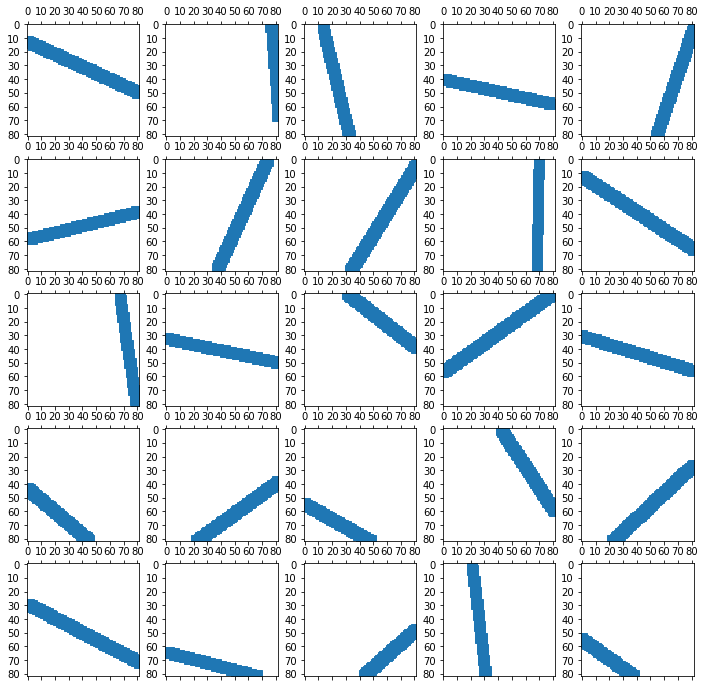

In [5]:
# visualizamos renglones arbitrarios de la matriz 
plt.figure(figsize=(12,12))

N = 5
for i in range(0,N**2):
    plt.subplot(N,N,i+1)
    index = np.random.randint(0,A.shape[0])
    proj = A[index,:].reshape(82,82)
    plt.spy(proj)

plt.show()

### Proyecciones 

In [6]:
sinogram = data['m'] # las almacenamos en la variable "sinogram"

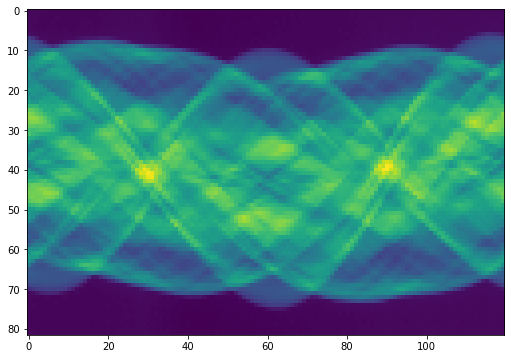

In [7]:
# visualizamos los valores del vector
plt.figure(figsize=(10,6))
plt.imshow(sinogram)
plt.show()

Se procede a realizar el modelo del problema matricial para su respectiva solución.  



### Solución por descomposición de valores singulares 

Se tiene el modelo $A\mathbf{x} = \mathbf{b}$, con $\mathbf{b}$ el vector de proyecciones que también tiene errores (ruido) en cada una de las entradas, por lo que se tiene:
$$
A \hat{\mathbf{x}} = \mathbf{b} + \mathbf{e}
$$

siendo $\mathbf{e}$ el ruido. Se realiza un truncamiento de la pseudoinversa para no invertir el ruido.

$$
\hat{\mathbf{x}} = A_k^+ ( \mathbf{b} + \mathbf{e} ) ... (1)
$$

In [8]:
b_e = sinogram.reshape([82*120,1],order='F') # redimensionamos el sinograma para poder operarse con la matriz A
k = 200 # definimos un límite para el truncamiento

P,S,QT = sla.svds(A,k=k) # se realiza la descomposición en valores singulares 
                        # devuelve:
                        # P -  Matriz unitaria con valores singulares por la izquierda como columnas.
                        # S - Valores singulares
                        # QT - Matriz unitaria con valores singulares por la derecha como columnas.

A_k_plus = QT.T @ np.diag(1/S) @ P.T # se construye la pseudoinversa

X = A_k_plus @ b_e # se aplica al modelo (ec 1)

Documentación de *svds (single value descomposition)*: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.svds.html#scipy.sparse.linalg.svds

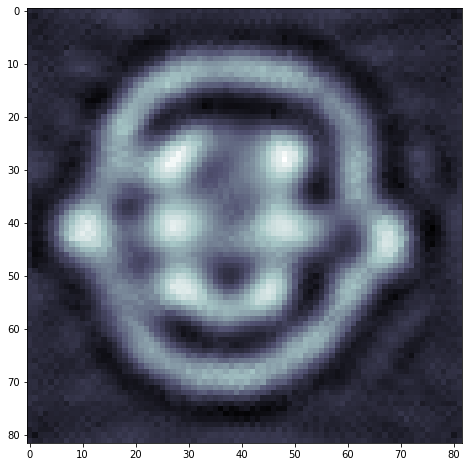

In [9]:
# mostramos los gráficos
plt.figure(figsize=(8,8))
plt.imshow(X.reshape(82,82).T,cmap='bone')
plt.show()

Podemos definir una función para solo ver el comportamiento con los distintos calores de *k* y sobre este, variar el parámetro.

In [10]:
def nutCT(k=200):
    import numpy as np 
    import scipy.sparse.linalg as sla
    import matplotlib.pyplot as plt
    from scipy.io import loadmat
    data = loadmat('C:/Users/iorla/OneDrive/Documentos/Temas Selectos Matematicas/Data82.mat')
    A = data['A'] 
    sinogram = data['m'] 
    b_e = sinogram.reshape([82*120,1],order='F')
    P,S,QT = sla.svds(A,k=k)
    A_k_plus = QT.T @ np.diag(1/S) @ P.T
    X = A_k_plus @ b_e
    plt.figure(figsize=(8,8))
    plt.imshow(X.reshape(82,82).T,cmap='bone')
    plt.show()

### k = 50

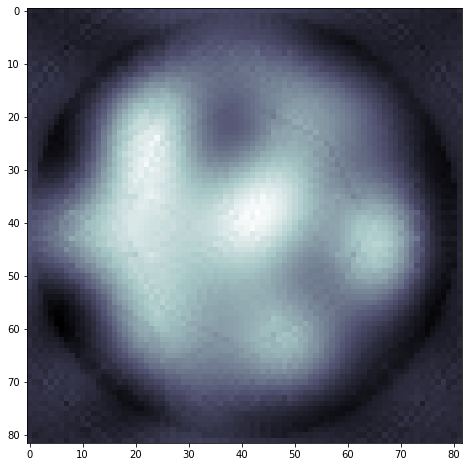

In [11]:
nutCT(50) # con k = 50

### k = 100

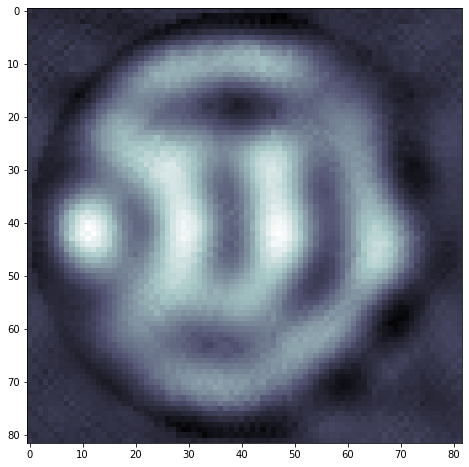

In [12]:
nutCT(100) # k = 100

### k = 200

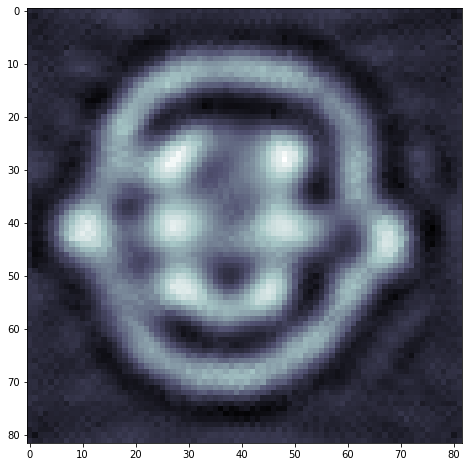

In [13]:
nutCT() # k = 200 implicitamente en la definición de la función

### k = 250

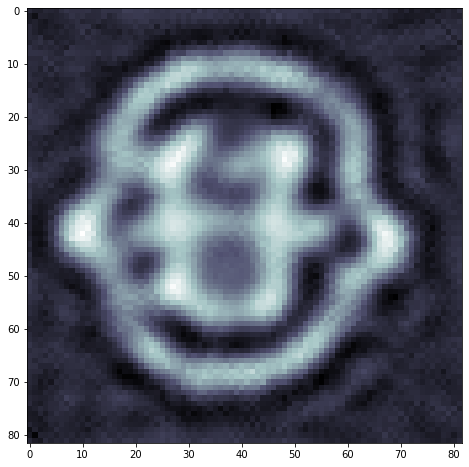

In [14]:
nutCT(250) # k = 250

# **Problema 2**  
Considere el trabajo realizado en https://zenodo.org/record/1254204#.ZBHkeHbMLIU sobre tomografía de rayos X de raíz de loto. Replique el algoritmo de Landweber para estos datos, para el cálculo iterativo de la pseudoinversa.

El método de Landweber parte de un modelo de problema inverso a base de aproximaciones por mínimos cuadrados; el problema que se tiene es:
$$
\mathcal{A} (x) = y,
$$
para un $y\in\bf{Y}$ con una solución aproximada de forma:
$$
\min_{x\in \mathcal{X}} \| \mathcal{A}(x) - y \|_{\mathcal{Y}}^2
$$.  
Dicha forma sigue la iteración:
$$
x_{k+1} = x_k -\omega \ \partial \mathcal{A}(x)^* (\mathcal{A}(x_k) - y)
$$

# Ignorar los *variable.shape*, se usaron para ver la dimensionalidad del producto matrcial

In [15]:
# descargamos, leemos y los almacenamos los datos de LoutsData128.mat en lotusRoot
lotusRoot = loadmat('C:/Users/iorla/OneDrive/Documentos/Temas Selectos Matematicas/LotusData128.mat')

In [16]:
lotusRoot

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Sep 15 15:43:47 2016',
 '__version__': '1.0',
 '__globals__': [],
 'A': <51480x16384 sparse matrix of type '<class 'numpy.float64'>'
 	with 12533230 stored elements in Compressed Sparse Column format>,
 'normA': array([[372.30568559]]),
 'normA_est': array([[372.30568559]]),
 'm': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])}

In [17]:
# almacenamos las variables de interés

A = lotusRoot['A']
#normA = lotusRoot['normA']
m = lotusRoot['m']
omega = 0.8

Recordando la forma de la iteración:
$$
 x_{k+1} = x_k -\omega \ \partial \mathcal{A}(x)^* (\mathcal{A}(x_k) - y)
$$
procedemos a construir el modelo

In [18]:
A.T.shape

(16384, 51480)

In [19]:
A.shape

(51480, 16384)

In [20]:
m = m.reshape([429*120,1],order='F') # ajustamos los valores de m ("A(x_k)" en este caso) para su correcta multiplicación
recn = np.zeros((128,128)) # generamos una matriz 128x128 de ceros

In [21]:
X.shape

(6724, 1)

In [22]:
y = recn.reshape(16384,1)
y.shape

(16384, 1)

In [23]:
Arecn = A*y # en este caso es "y"
Arecn.shape

(51480, 1)

In [24]:
diff = m-Arecn # A(x_k)-y

In [25]:
tmp = A.T @ diff # A(x)*A(x_k)-y

In [26]:
tmp.shape

(16384, 1)

In [27]:
tmp = tmp.reshape(128,128)

In [28]:
recn = recn + omega*tmp # aplicamos el método de iteración

In [29]:
# colocamos el código anterior en un ciclo para reducir el error siguiendo el modelo
for i in range(500):
    Arecn = A*y
    diff = m-Arecn 
    tmp = A.T @ diff
    tmp = tmp.reshape(128,128)
    recn = recn + omega*tmp
    recn = np.maximum(0,recn) # escogemos los valores máximos de cada arreglo de números
    '''
    if (i%37 == 0) or (i == 500):
        plt.figure(figsize=(8,8))
        plt.imshow(recn.T,cmap='bone')
        plt.show()
    '''

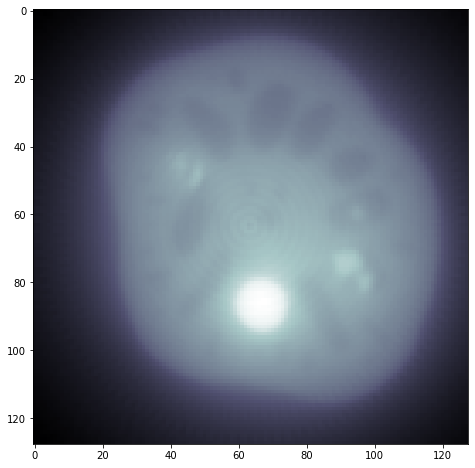

In [30]:
# Mostramos el gráfico
plt.figure(figsize=(8,8))
plt.imshow(recn.T,cmap='bone')
plt.show()

In [31]:
# definimos la funcion lotusRoot que contiene el proceso anterior

def lotusRoot(k=500):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.io import loadmat
    lotusRoot = loadmat('C:/Users/iorla/OneDrive/Documentos/Temas Selectos Matematicas/LotusData128.mat')
    A = lotusRoot['A']
    m = lotusRoot['m']
    omega = 0.8
    m = m.reshape([429*120,1],order='F') 
    recn = np.zeros((128,128))
    y = recn.reshape(16384,1)
    for i in range(k):
        Arecn = A*y
        diff = m-Arecn 
        tmp = A.T @ diff
        tmp = tmp.reshape(128,128)
        recn = recn + omega*tmp
        recn = np.maximum(0,recn)
    plt.figure(figsize=(8,8))
    plt.imshow(recn.T,cmap='bone')
    plt.show()

In [32]:
# encontré la paquetería que lo automatiza pero aún estoy comprendiendolo, no anexo su ejecución
from odl.solvers.iterative.iterative  import landweber

**Problema 3**  
Establezca el algoritmo de Landweber para cálculo iterativo de la pseudoinversa con los datos del Problema 1.

In [33]:
# seguimos el mismo algoritmo de la función "lotusRoot" definida anteriormente

def landweber_nutCT(k=200):
    import numpy as np 
    import scipy.sparse.linalg as sla
    import matplotlib.pyplot as plt
    from scipy.io import loadmat
    data = loadmat('C:/Users/iorla/OneDrive/Documentos/Temas Selectos Matematicas/Data82.mat')
    A = data['A'] 
    sinogram = data['m'] 
    b_e = sinogram.reshape([82*120,1],order='F')
    omega = 0.8
    cont = np.zeros((82,82))
    d = cont.reshape(6724,1)
    for i in range(k):
        y = A*d
        diff = b_e - y
        tmp = A.T @ diff
        tmp = tmp.reshape(82,82)
        cont = cont+omega*tmp
        cont = np.maximum(0,cont)
    plt.figure(figsize=(8,8))
    plt.imshow(cont.T,cmap='bone')
    plt.show()

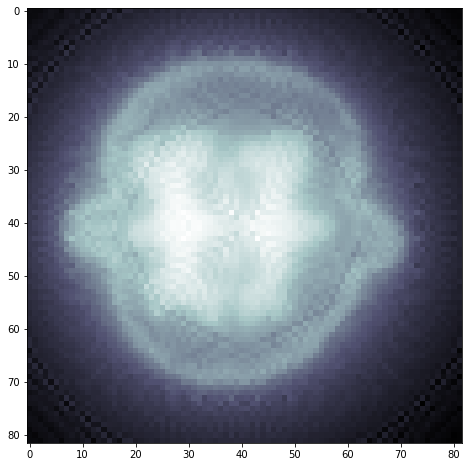

In [34]:
landweber_nutCT(200)

*Irving Orlando Ayala Iturbe*  
*Marzo 23 de 2023*